Recurrent Neural Networks for predicting Times Series

Stanford Research Paper Times Series Prediction with Recurrent Neural Networks to predict Google Stock Price. Comparable to even substantially better than Stanford's results in 2012 with LSTM, substantial research (10 days just researching) - did not believe the results as they were too good to be true, duty of care to disclose. Not possible to predict Stock Market to that extent, investigating the results, ideally it's impossible (100%) or results shown.

What we suspect is going on here: real Google Stock price is in red and the predicted tcok price is in blue, should be shifted to the right and the RNN is taking the current amount and adding a little amount it percentage, and that's its prediction. Copy what happened today with a slight adjustment, bad news is that the RNN can't learn from the price as there's too many movement and cannot learn certain patterns and predict what's going on, pretty much just seeing what's it see today and adding a small value upward trend, not predict and not seem possible. Not possible with this kind of implementation. Good news is that all of the code is still valid, exactly how you'd construct an LSTM, how you'd add layers, how to tune it, how to add parameters and sets input for LSTM, still applicable.

THe code is applicable. Sales pattern or volumes of customers still be able to apply the same template and check results -> shift by one. Unfortunately, Google stock price is not working across the board - fall into the same pitfall.

In [38]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
import seaborn as sns
sns.set(context='notebook',
        style='whitegrid',
        palette='deep',
        font='sans-serif',
        font_scale=1,
        color_codes=True,
        rc=None)

In [3]:
df_train = pd.read_csv('tsm_train.csv', sep = ',', error_bad_lines = False, warn_bad_lines = True)
df_test = pd.read_csv('tsm_test.csv', sep = ',', error_bad_lines = False, warn_bad_lines = True)

In [19]:
df_train.set_index(df_train.iloc[:,0], inplace=True)
df_test.set_index(df_test.iloc[:,0], inplace=True)
df_train = df_train.fillna(method='ffill', downcast='infer') # Replacing nan values with forward fill
df_test = df_test.fillna(method='ffill', downcast='infer')
print('Training DF shape: {}'.format(df_train.shape))
print('Testing DF shape: {}'.format(df_test.shape))

Training DF shape: (1258, 7)
Testing DF shape: (21, 7)


In [20]:
df_train.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-08-01,2016-08-01,28.35,28.75,28.35,28.620001,24.683821,7328200


In [21]:
df_train.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-07-29,2021-07-29,116.0,117.110001,115.610001,116.150002,116.150002,7162000


In [22]:
df_test.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-08-02,2021-08-02,117.5,118.379997,116.660004,116.860001,116.860001,6028800


In [23]:
df_test.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-08-30,2021-08-30,118.879997,119.5,118.470001,118.989998,118.989998,6434200


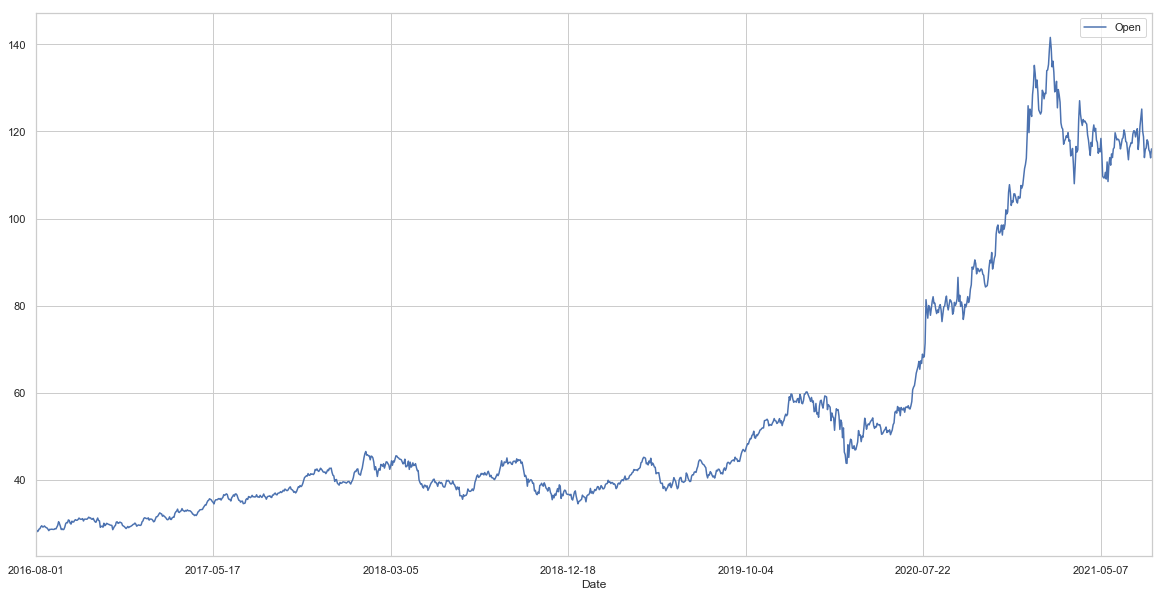

In [28]:
df_train.iloc[:, 1:2].plot(figsize=(20,10))
plt.show()

21


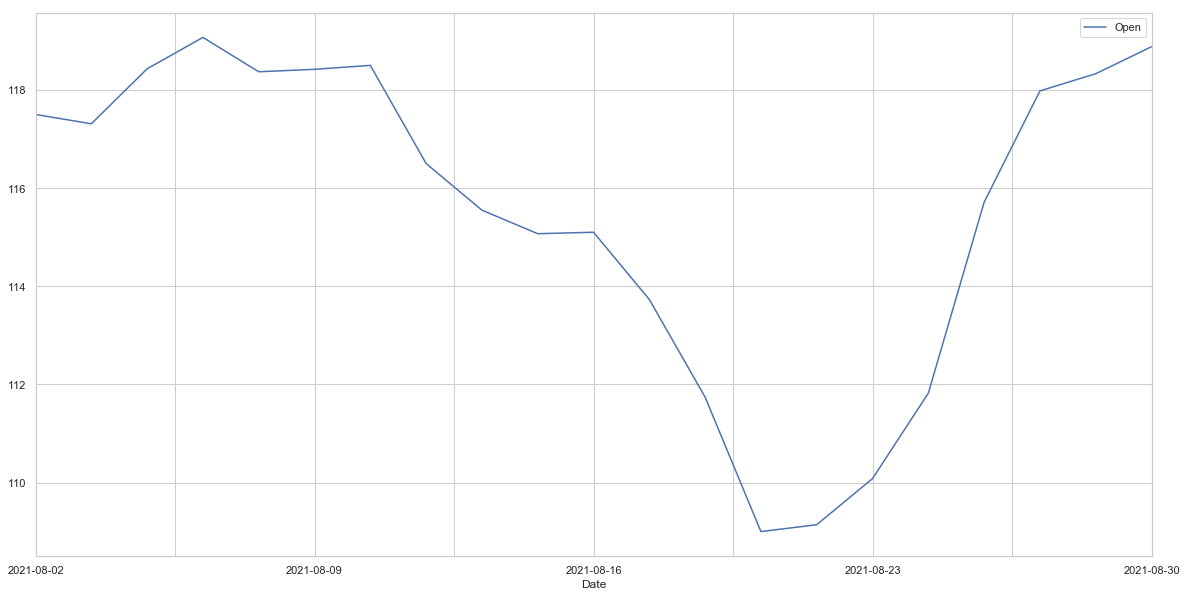

In [52]:
df_test.iloc[:, 1:2].plot(figsize=(20,10))
print(len(df_test))
plt.show()

In [24]:
training_set = df_train.iloc[:, 1:2].values # 取「Open」欄位值
testing_set = df_test.iloc[:, 1:2].values # 取「Open」欄位值

In [30]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

準備進入訓練的資料格式：設定 Timestep
Timesteps 設為 60 ，代表過去 60 天的資訊，嘗試過數值設置太少，將使 RNN 無法學習。

In [31]:
X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

Reshape
因為現在 X_train 是 2-dimension，將它 reshape 成 3-dimension: [stock prices, timesteps, indicators]

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
pip install Keras --user

Note: you may need to restart the kernel to use updated packages.


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [37]:
# Initialising the RNN
regressor = Sequential()

搭建 LSTM layer:
units: 神經元的數目
第一層的 LSTM Layer 記得要設定input_shape參數
搭配使用dropout，這裡設為 0.2
由於這邊的第四層 LSTM Layer 即將跟 Ouput Layer 做連接，因此注意這邊的 return_sequences 設為預設值 False （也就是不用寫上 return_sequences）

In [39]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Ouput Layer: units 設為 1

In [40]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [65]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

Compiling & Fitting LSTM model
optimizer: 選擇 Adam
loss: 使用 MSE

In [69]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 55ms/step - loss: 0.0011
Epoch 2/100
38/38 [==============================] - 2s 56ms/step - loss: 9.0298e-04
Epoch 3/100
38/38 [==============================] - 2s 54ms/step - loss: 9.3200e-04
Epoch 4/100
38/38 [==============================] - 2s 54ms/step - loss: 8.5083e-04
Epoch 5/100
38/38 [==============================] - 2s 55ms/step - loss: 8.3312e-04
Epoch 6/100
38/38 [==============================] - 2s 53ms/step - loss: 8.8960e-04
Epoch 7/100
38/38 [==============================] - 2s 55ms/step - loss: 9.3031e-04
Epoch 8/100
38/38 [==============================] - 2s 58ms/step - loss: 8.6244e-04
Epoch 9/100
38/38 [==============================] - 2s 57ms/step - loss: 8.3436e-04
Epoch 10/100
38/38 [==============================] - 2s 58ms/step - loss: 8.2593e-04
Epoch 11/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0011
Epoch 12/100
38/38 [==============================] - 2s 55ms/step - lo

38/38 [==============================] - 2s 62ms/step - loss: 6.5117e-04
Epoch 97/100
38/38 [==============================] - 2s 62ms/step - loss: 7.0779e-04
Epoch 98/100
38/38 [==============================] - 2s 61ms/step - loss: 7.1414e-04
Epoch 99/100
38/38 [==============================] - 2s 59ms/step - loss: 6.5726e-04
Epoch 100/100
38/38 [==============================] - 2s 61ms/step - loss: 7.3419e-04


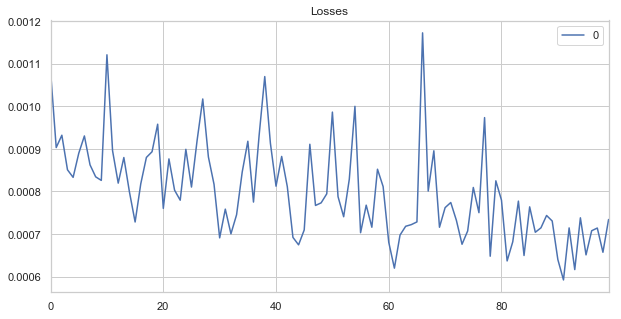

In [73]:
losses = pd.DataFrame(history.history['loss'])
losses.plot(figsize=(10,5))
plt.title('Losses')
plt.show()

In [74]:
# Prediction
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 81):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

In [75]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

21
21


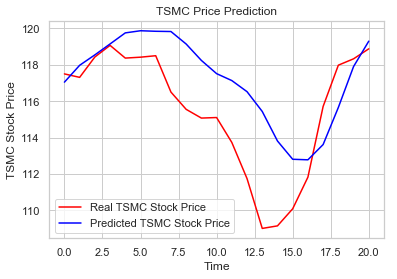

In [76]:
print(len(testing_set))
print(len(predicted_stock_price))
# Visualising the results
plt.plot(testing_set, color = 'red', label = 'Real TSMC Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TSMC Stock Price')  # 藍線表示預測股價
plt.title('TSMC Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSMC Stock Price')
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error (RSME): {0}".format(math.sqrt(mean_squared_error(testing_set, predicted_stock_price))))

price_table = pd.DataFrame(
    {'Date': df_test['Date'].tolist(),     
     'Real Price': testing_set.flatten(),
     'Predicted Price': predicted_stock_price.flatten()
    })
price_table


Root Mean Squared Error (RSME): 2.7821190285424255


,Date,Real Price,Predicted Price
0,2021-08-02,117.500000,117.045769
1,2021-08-03,117.309998,117.973160
2,2021-08-04,118.430000,118.546097
3,2021-08-05,119.070000,119.147919
4,2021-08-06,118.370003,119.756401
5,2021-08-09,118.419998,119.874268
6,2021-08-10,118.500000,119.844818
7,2021-08-11,116.500000,119.831612
8,2021-08-12,115.550003,119.143295
9,2021-08-13,115.070000,118.241386
